In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import ipywidgets as widgets
from gaslight.grid import Grid
from synthesizer.line import (
    get_diagram_labels,)
from synthesizer import line_ratios

In [2]:

grid_dir = '/Users/sw376/Dropbox/Research/data/gaslight/grids'

grid_name = 'bpass-2.2.1-bin_chabrier03-0.1,300.0-ages:6.,7.,8.-c23.01-full'
grid_name = 'qsosed-isotropic-limited-agn-c23.01-v1'
grid_name = 'qsosed-isotropic-limited-agn-c23.01-test-v1'
grid_name = 'qsosed-isotropic-limited-agn-c23.01-extremes-v1'
# grid_name = 'qsosed-isotropic-limited-agn-c23.01-reduced-v1'
# grid_name = 'bpl-feltre16-agn-c23.01-extremes-v1' # not working, use reduced

# grid_name = 'bpl-feltre16-agn-c23.01-reduced-v1'
# grid_name = 'qsosed-isotropic-limited-agn-c23.01-v1'

g = Grid(grid_dir=grid_dir, grid_name=grid_name)

print(g)

------------------------------
SUMMARY OF GASLIGHT GRID
mass: [1.e+06 1.e+07 1.e+08 1.e+09 1.e+10] 
accretion_rate_eddington: [0.03162278 0.1        0.31622777 1.        ] 
metallicity: [0.0001 0.05  ] 
ionisation_parameter: [1.e-04 1.e+00] 
hydrogen_density: [1.e+00 1.e+12] 
stop_column_density: [21. 25.] 
available lines: ['Al 2 1670.79A', 'Al 2 2669.15A', 'Al 3 1854.72A', 'Al 3 1862.79A', 'Al 6 2428.39A', 'Ar 3 7135.79A', 'Ar 3 7751.11A', 'Ar 4 2853.66A', 'Ar 4 2868.22A', 'Ar 4 4740.12A', 'Ar 4 7170.70A', 'Ar 4 7237.77A', 'Ar 4 7263.33A', 'Ar 5 6435.12A', 'Ar 5 7005.83A', 'C 1 1560.31A', 'C 1 1560.68A', 'C 1 1560.71A', 'C 1 1561.34A', 'C 1 1561.37A', 'C 1 1561.44A', 'C 1 1656.27A', 'C 1 1656.93A', 'C 1 1657.01A', 'C 1 1657.38A', 'C 1 1657.91A', 'C 1 1658.12A', 'C 1 1992.01A', 'C 1 1993.62A', 'C 1 2478.56A', 'C 1 2582.90A', 'C 1 8727.13A', 'C 1 9824.13A', 'C 1 9850.26A', 'C 2 1036.34A', 'C 2 1037.02A', 'C 2 1334.53A', 'C 2 1335.66A', 'C 2 1335.71A', 'C 2 2323.50A', 'C 2 2324.69A', 'C

## Flatten

In [3]:
g.flatten()
print(len(g.axes_values_flattened[g.axes[0]]))

320


Check how many models failed

In [4]:
# select lines for which Halpha is recorded
selection = g.luminosity_flattened['H 1 6562.80A'].value == False 
print(f'{np.sum(selection)} ({100*np.sum(selection)/len(selection):.2f}%)')

2 (0.62%)


## Bolometric correction

In normalised AGN grids the the line luminosities should be the bolometric corrections.

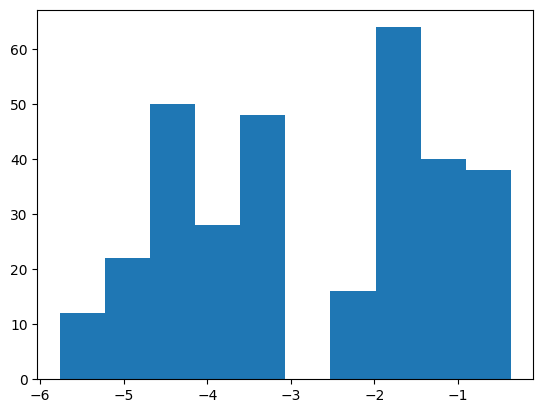

In [5]:
selection = g.luminosity_flattened['H 1 6562.80A'].value != False 
plt.hist(np.log10(g.luminosity_flattened['H 1 6562.80A'][selection].to('erg/s').value))
plt.show()

## BPT diagram

In [6]:
diagram_id = 'BPT-NII'

lines_ids = line_ratios.diagrams[diagram_id]
print(lines_ids)

[['N 2 6583.45A', 'H 1 6562.80A'], ['O 3 5006.84A', 'H 1 4861.32A']]


In [7]:
# Define diagram to use and quantity to colour by
axis_to_colour_by = 'metallicity'
norm = Normalize(vmin=-5., vmax=-1.)
cmap = cm.viridis

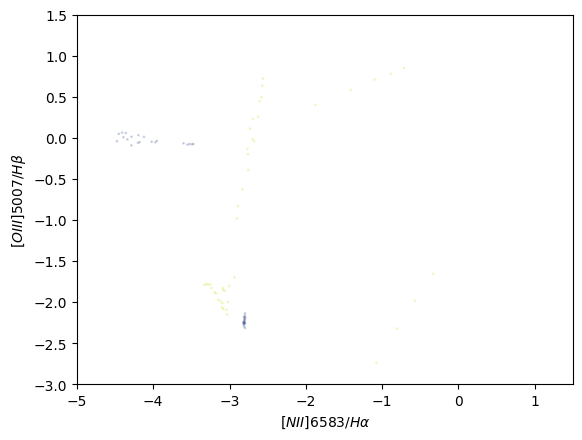

In [8]:
# x
a, b = lines_ids[0]
x = np.sum([g.luminosity_flattened[_line][selection] for _line in a.split(',')], axis=0) / np.sum([g.luminosity_flattened[_line][selection] for _line in b.split(',')], axis=0)

# y
a, b = lines_ids[1]
y = np.sum([g.luminosity_flattened[_line][selection] for _line in a.split(',')], axis=0) / np.sum([g.luminosity_flattened[_line][selection] for _line in b.split(',')], axis=0)

plt.scatter(np.log10(x), np.log10(y), s=1, alpha=0.2, c=cmap(norm(np.log10(g.axes_values_flattened[axis_to_colour_by][selection]))))

plt.xlim([-5., 1.5])
plt.ylim([-3., 1.5])

x_label, y_label = get_diagram_labels(diagram_id)

# add axes labels
plt.xlabel(rf'${x_label}$')
plt.ylabel(rf'${y_label}$')

# show
plt.show()

## Balmer decrement histogram

In [9]:

# define ratio
ratio_line_ids = line_ratios.ratios['BalmerDecrement']
ratio = g.luminosity_flattened[ratio_line_ids[0]]/g.luminosity_flattened[ratio_line_ids[1]]

selection = g.luminosity_flattened['H 1 6562.80A'].value != False 

print(np.min(ratio[selection]), np.median(ratio[selection]), np.max(ratio[selection]))

# define bins
nbins = 100
bins = np.linspace(np.min(ratio[selection]), np.max(ratio[selection]), nbins)

1.2563747722072265 dimensionless 2.7497608396780295 dimensionless 30.182535767143563 dimensionless


/Users/sw376/Dropbox/Research/projects/gaslight/venv/lib/python3.10/site-packages/unyt/array.py:1949: RuntimeWarning: invalid value encountered in divide
  out_arr = func(


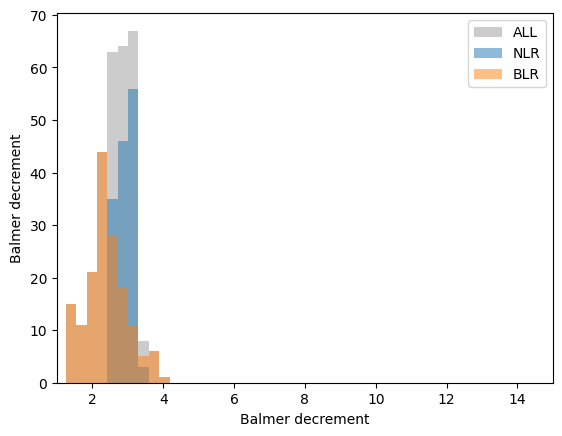

In [10]:

# all models
selection = g.luminosity_flattened['H 1 6562.80A'].value != False 
plt.hist(ratio[selection], bins=bins, label='ALL', alpha=0.2, color='k')

# NLR like models
selection = (g.luminosity_flattened['H 1 6562.80A'].value != False ) & (g.axes_values_flattened['hydrogen_density'] <= 1E5)
plt.hist(ratio[selection], bins=bins, label='NLR', alpha=0.5)

# BLR like models
selection = (g.luminosity_flattened['H 1 6562.80A'].value != False ) & (g.axes_values_flattened['hydrogen_density'] >= 1E9)
plt.hist(ratio[selection], bins=bins, label='BLR', alpha=0.5)

plt.xlim(1, 15)
plt.legend()
plt.xlabel('Balmer decrement')
plt.ylabel('Balmer decrement')
plt.show()

## Balmer decrement vs. bolometric correction

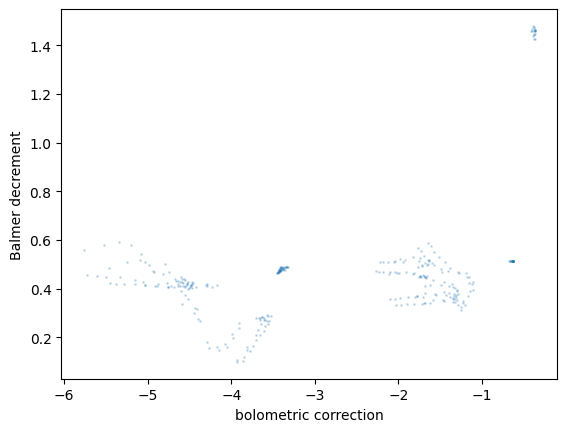

In [11]:
# all models
selection = g.luminosity_flattened['H 1 6562.80A'].value != False 

plt.scatter(np.log10(g.luminosity_flattened['H 1 6562.80A'][selection].value), np.log10(ratio[selection]), s=1, alpha=0.2)

# plt.xlim(1, 15)

plt.xlabel('bolometric correction')
plt.ylabel('Balmer decrement')
plt.show()

## Equivalent widths

<class 'numpy.ndarray'>


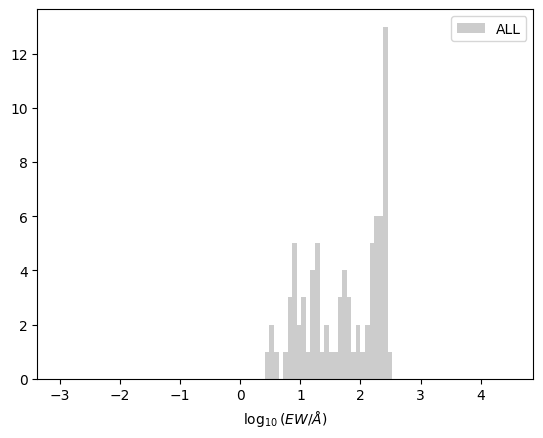

In [22]:

# define bins
nbins = 100
bins = np.linspace(-3, 4.5, nbins)

# calculate equivalent widths
g.calculate_equivalent_widths()

# reflatten the grids
g.flatten()

halpha_equivalent_width = g.equivalent_widths_flattened['H 1 6562.80A'].to('Angstrom').value

# all models
working_models = g.luminosity_flattened['H 1 6562.80A'].value != False 

selection = working_models
x = halpha_equivalent_width[selection]
print(type(x))
plt.hist(np.log10(x), bins=bins, label='ALL', alpha=0.2, color='k')

# # NLR like models
# selection = working_models & (g.axes_values_flattened['hydrogen_density'] <= 1E5)
# x = halpha_equivalent_width[selection]
# plt.hist(np.log10(x), bins=bins, label='NLR', alpha=0.5)

# # BLR like models
# selection = working_models & (g.axes_values_flattened['hydrogen_density'] >= 1E9)
# x = halpha_equivalent_width[selection]
# plt.hist(np.log10(x), bins=bins, label='BLR', alpha=0.5)

plt.legend()
plt.xlabel('$\log_{10}(EW/\AA)$')
plt.show()
